# Lecture 14: Convolutional Neural Networks 

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1CxeEInBOmkXyYx-vBjKzYCh8Uaoccgsd)

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2024-01-10 00:25:43


In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Motivation

### Visual cortex

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/eye_rods_cones.jpg" width="700px" style="display:block; margin:auto"/>

[[Image source](https://www.blueconemonochromacy.org/wp-content/uploads/2011/02/1_EN.jpg)]


Neurons in the visual cortex have a small local receptive field, i.e. only react to limited region of visual field.

Receptive fields of neurons overlap and together cover full visual field.

### Architecture of the visual cortex

Some neurons only sensitive to stimuli of certain structure, e.g. horizonal lines.

Some neurons have larger receptive fields, and are sensitive to stimuli that are combinations of lower-level patterns.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/localFov.jpeg" width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

Corresponding architecture can detect complex patterns in full visual field, which inspires design of convolutional neural networks (CNNs).

## Convolution

Core building block of CNNs is convolution.

###  Graphical description

Convolution involves passing a filter (kernel) over an image and taking the sum of the product of terms for all positions.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-14.png" width="700px" style="display:block; margin:auto"/>


<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-24.png"  width="700px" style="display:block; margin:auto"/>


#### Animation of convolution

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution.gif"  width="700px" style="display:block; margin:auto"/>

[[Animation source](https://miro.medium.com/max/1000/1*GcI7G-JLAQiEoCON7xFbhg.gif)]


###  Mathematical description

Convolution output is given by
\begin{align*}
z_{i,j} = \sum_{u,v} x_{u,v} w_{u-i,v-j},
\end{align*}
where $x$ is the input image, $w$ is the filter (kernel) and $i$ ($u$) and $j$ ($v$) denote row and column indices, respectively.

(Note that the kernel is not reflected as is typical in the usual mathematical definition of convolution.)

### Advantages

- Localisation: Capture local structure.
- Efficiency: weight sharing results in dramatic reduction in number of weights (parameters) compared to fully-connected neural network.
- Translational equivariance: Feature space behavies "nicely" under a translation of the input.  In a sense, learn general features rather than features for all locations of image.
- Composition: Can compose convolutions to extract more complex features.

## Convolutional layers

Define neural network layers using convolutions.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/geron_convolutional_layers.png"  width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

Allows the network to focus on small low-level features in the first layer and use these to constuct higher-level features in next layer, and so on.  

Results in a hierarchical representation that is common in images of the real-world.

### Filters and features

Filters pull out corresponding features from image.  

Output of convolutional layer is typically called a *feature map*.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/geron_feature_maps.png"  width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

During training, effective filters to extract representative features are learned.

### Padding

Nominally, convolution results in an output image that is *smaller* than the input.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-24.png"  width="700px" style="display:block; margin:auto"/>

Various modifications to the nominal convolution are often considered.


#### Animation of convolution (no padding, no stride)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_no_padding_no_strides.gif"  width="500px" style="display:block; margin:auto"/>

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif)]

Blue pixels denote the input image, grey the convolutional kernel as it moves over the image, and green pixels denote the output.

Padding often introduced to control output size.

#### Animation of convolution (padding, no stride)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_arbitrary_padding_no_strides.gif"  width="500px" style="display:block; margin:auto">

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/arbitrary_padding_no_strides.gif)]

Uncoloured pixels denote padding with zeros.

### Stride

#### Animation of convolution (no padding, stride)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_no_padding_strides.gif" width="500px" style="display:block; margin:auto"/>

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_strides.gif)]

### Padding and stride

#### Animation of convolution (padding, stride)

stride means number of pixels moved, in this case it is 2

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/conv_padding_strides.gif" width="500px" style="display:block; margin:auto"/>

[[Animation source](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/padding_strides.gif)]

### Channels

#### Multiple input channels

Input images often have multiple channels, e.g. red, green and blue colour channels.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/rgb_2.jpg"  width="700px" style="display:block; margin:auto"/>

[[Image source](https://code.tutsplus.com/tutorials/create-a-retro-crt-distortion-effect-using-rgb-shifting--active-3359)]

Support multiple input channels by defining a filter for each channel and summing result.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-operation-on-volume5.png" width="700px" style="display:block; margin:auto"/>

#### Multiple input and output channels

Add a set of filters for each desired output channel.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/convolution-with-multiple-filters2.png"  width="700px" style="display:block; margin:auto"/>

#### Mathematical description

Convolution output is given by
\begin{align*}
z_{i,j,k_\text{out}} = \sum_{u,v,k_\text{in}} x_{u,v,k_\text{in}} w_{u-i,v-j,k_\text{in},k_\text{out}},
\end{align*}
where $x$ is the input image, $w$ is the filter (kernel) and $i$ ($u$) and $j$ ($v$) denote row and column indices, respectively.  The input channel index is denoted $k_\text{in}$ and the output channel index $k_\text{out}$.

Notice that the filter is now 4-dimensional.  We quickly add a lot of additional parameters.

### Non-linear activations

Convolutions usually followed by pointwise activation functions to introduce non-linearity (cf. fully-connected neural networks).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/activation_func.png"  width="500px" style="display:block; margin:auto"/>

### Full convolutional layer

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/one-convolution-layer1.png"  width="900px" style="display:block; margin:auto"/>

## Pooling layers

Pooling layers are used to downsample to reduce the computational load, memory usage and number of parameters.

Retains equivariance to large translation and can introduce invariance to small translations.

### Max pooling

Take maximum over parent cell size, translating cell over image.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/pooling-layer3_max.png"  width="500px" style="display:block; margin:auto"/>

### Average pooling

Take average over parent cell size, translating cell over image.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/pooling-layer3_average.png"  width="500px" style="display:block; margin:auto"/>

### Multiple input channels

When considering multiple input channels, pooling is performed separately for each channel.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/pooling-on-volume1.png" width="500px" style="display:block; margin:auto"/>

## CNN architectures

### Stacking multiple feature maps

Convolutional layers typically stacked with multiple input and output channels, leading to multiple feature maps.

Neuron's receptor field extends across all previous layers' feature maps.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/stacked.jpeg"  width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

### Basic CNN architecture

Basic CNN architecture typically consists of combining the following layers:
- Convolutions
- Non-linear activations
- Pooling

And repeating.

Final layers are then added on that are tailored to the problem at hand (often fully connected layers).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/aCNN.jpeg" alt="Drawing"  width="1100px" style="display:block; margin:auto"/>

[Credit: Geron]

### CNN explainer

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/cnn_explainer.png"  width="700px" style="display:block; margin:auto"/>

The [CNN explainer](https://poloclub.github.io/cnn-explainer/) is a great visualisation tool, allowing you to look inside a CNN to visualise the layers making up a network.

### LeNet architecture

Convolutional layers first introduced by [Lecun et al.](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) in 1998 for digital classification problem.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/lenet-52.png"  width="900px" style="display:block; margin:auto"/>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/lenet_summary.png"  width="700px" style="display:block; margin:auto"/>

### AlexNet

[AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), which helped to intitiate the deep learning revolution in 2012, was based on a CNN architecture and showed a significant improvement in performance on the [ImageNet](https://www.image-net.org/) benchmark problem compared to the state-of-the-art at the time.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/alexnet.png"  width="900px" style="display:block; margin:auto"/>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/alexnet_summary.png"  width="700px" style="display:block; margin:auto"/>

### VGG

The [VGG network](https://arxiv.org/abs/1409.1556) followed soon afterwards, making another significant improvement in performance, while simplifying the architecture.

VGG-16 uses 3x3 convolutions only and max pooling layers that step down by a factor of two at each stage.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture14_Images/vgg16.png"  width="900px" style="display:block; margin:auto"/>



## Implementing CNNs in TensorFlow

### Load and set up data

Let's consider fashion MNIST again.

In [3]:
import tensorflow as tf
from tensorflow import keras

2024-01-10 00:25:44.549473: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:25:44.600874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:25:44.601966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-01-10 00:25:45.420709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Load fashion MNIST data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-30000], X_train_full[-30000:]
y_train, y_valid = y_train_full[:-30000], y_train_full[-30000:]

# Standardize
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Add final channel axis (one channel)
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

### Plot example data instance

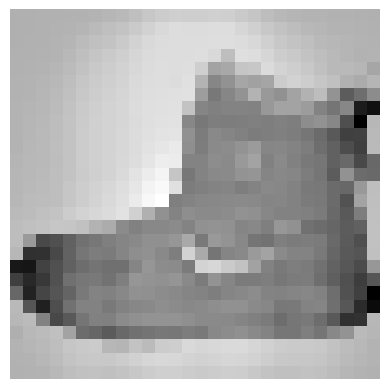

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### Build CNN model

In [6]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=4, kernel_size=7, activation="relu", padding="same", 
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 4)         200       


 max_pooling2d (MaxPooling2  (None, 14, 14, 4)         0         


 D)                                                              


 flatten (Flatten)           (None, 784)               0         


 dense (Dense)               (None, 8)                 6280      


 dense_1 (Dense)             (None, 10)                90        


Total params: 6570 (25.66 KB)


Trainable params: 6570 (25.66 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### Compile and fit model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*